In [4]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('game data.csv')

In [7]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [8]:
df = df.drop(['Days'], axis= 1)

In [9]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [11]:
df.isnull().sum()

Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [13]:
df.value_counts()

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Name: count, dtype: int64

In [14]:
df['Outlook'].value_counts()

Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [16]:
df['Routine'].value_counts()

Routine
Indoor     4
Outdoor    4
Name: count, dtype: int64

In [18]:
df['Temprature'].value_counts()

Temprature
Cold    4
Warm    4
Name: count, dtype: int64

In [19]:
x = df.drop(['Wear Jacket?'], axis = 1)
y = df[['Wear Jacket?']]

In [20]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [21]:
y

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes
5,No
6,No
7,No


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [28]:
x[['Outlook', 'Temprature', 'Routine']] = x[['Outlook', 'Temprature', 'Routine']].apply(lambda col:le.fit_transform(col))

In [30]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [31]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier(criterion='entropy')

In [35]:
clf.fit(x,y) 

DecisionTreeClassifier(criterion='entropy')

In [36]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [37]:
clf.predict([[0,0,1]])

array(['Yes'], dtype=object)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

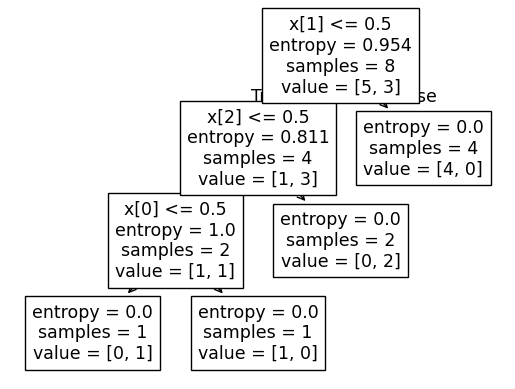

In [38]:
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

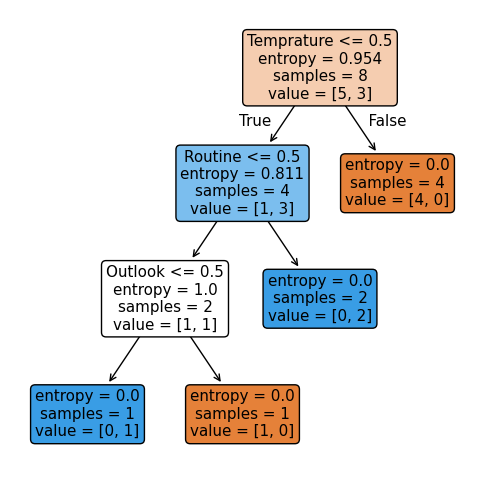

In [40]:
plt.figure(figsize=(6,6))
tree.plot_tree(clf, feature_names=x.columns, filled=True, rounded=True)